## Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
bairro_alugar = pd.read_csv('Previsão_NY.csv')
bairro_alugar.head()

,id,nome,id_anfitrião,nome_anfitrião,grupo_bairros,bairro,latitude,longitude,tipo_acomodação,preço,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,quantidade_calculada_anuncio_anfitrião,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [3]:
# Calcular o preço médio do aluguel por bairro
preco_medio = bairro_alugar.groupby("grupo_bairros")["preço"].mean().sort_values(ascending=False)

print(preco_medio)

grupo_bairros
Manhattan        180.052489
Brooklyn         121.447039
Queens            95.762571
Staten Island     89.964968
Bronx             79.553653
Name: preço, dtype: float64


In [4]:
# Calcular a disponibilidade média por bairro
disponibilidade_media = bairro_alugar.groupby("grupo_bairros")["disponibilidade_365"].mean().sort_values(ascending=False)

print(disponibilidade_media)

grupo_bairros
Staten Island    205.640127
Bronx            170.940639
Queens           150.508308
Manhattan        109.322932
Brooklyn         105.863553
Name: disponibilidade_365, dtype: float64


In [5]:
# Estimar receita anual média por bairro
melhor_retorno = pd.DataFrame({
    "preco_medio": preco_medio,
    "disponibilidade_media": disponibilidade_media
})

melhor_retorno["receita_anual_estimada"] = melhor_retorno["preco_medio"] * melhor_retorno["disponibilidade_media"]

print(melhor_retorno.sort_values(by="receita_anual_estimada", ascending=False))

               preco_medio  disponibilidade_media  receita_anual_estimada
grupo_bairros                                                            
Manhattan       180.052489             109.322932            19683.865976
Staten Island    89.964968             205.640127            18500.407511
Queens           95.762571             150.508308            14413.062522
Bronx            79.553653             170.940639            13598.952295
Brooklyn        121.447039             105.863553            12856.815082


Manhattan é a melhor opção para investimento, embora sua disponibilidade média seja mais baixa comparada a outros bairros;
Queens oferece uma boa combinação entre preço e disponibilidade, sendo uma opção sólida

In [6]:
# Calcular preço médio, disponibilidade e receita anual estimada por bairro e tipo de acomodação
tipo_acomodacao = bairro_alugar.groupby(["grupo_bairros", "tipo_acomodação"]).agg({
    "preço": "mean",
    "disponibilidade_365": "mean"
}).reset_index()

# Calcular a receita anual estimada
tipo_acomodacao["receita_anual_estimada"] = tipo_acomodacao["preço"] * tipo_acomodacao["disponibilidade_365"]

# Mostrar resultados
print(tipo_acomodacao.sort_values(by="receita_anual_estimada", ascending=False))

    grupo_bairros  tipo_acomodação       preço  disponibilidade_365  \
6       Manhattan  Entire home/apt  230.190830           111.026487   
12  Staten Island  Entire home/apt  125.366667           184.026667   
0           Bronx  Entire home/apt  120.789644           168.391586   
9          Queens  Entire home/apt  139.225603           139.386338   
3        Brooklyn  Entire home/apt  171.249265           102.327903   
13  Staten Island     Private room   57.584906           229.823899   
11         Queens      Shared room   64.467105           200.500000   
8       Manhattan      Shared room   77.980337           148.255618   
7       Manhattan     Private room  106.603265           104.434776   
10         Queens     Private room   69.286567           154.902239   
1           Bronx     Private room   57.093511           173.635496   
2           Bronx      Shared room   56.930233           156.418605   
4        Brooklyn     Private room   73.330330           107.056807   
5     

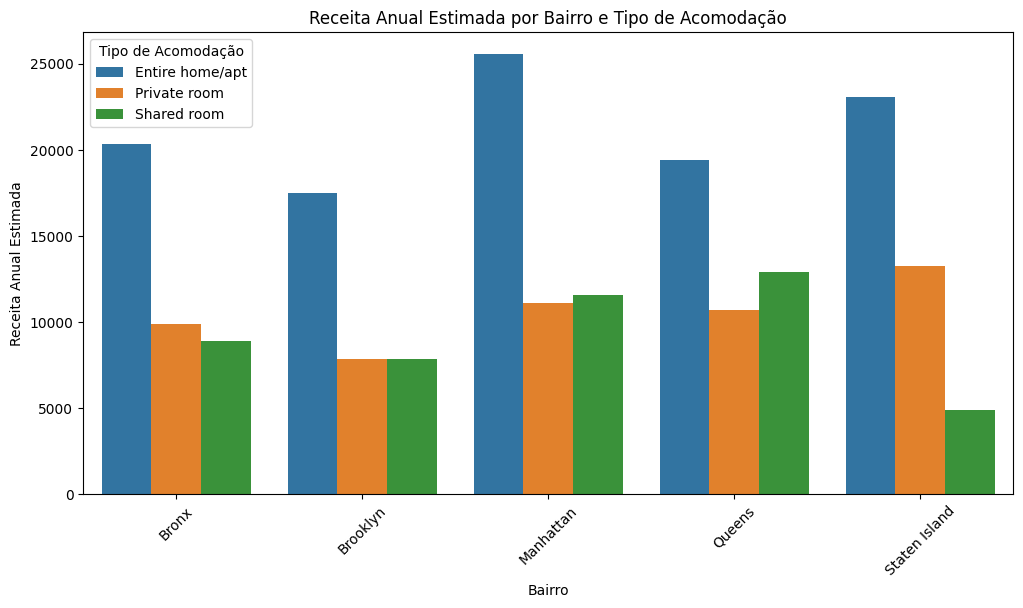

In [7]:
# Gráfico de barras para comparar preço médio e receita anual estimada
plt.figure(figsize=(12, 6))
sns.barplot(data=tipo_acomodacao, x="grupo_bairros", y="receita_anual_estimada", hue="tipo_acomodação")
plt.title("Receita Anual Estimada por Bairro e Tipo de Acomodação")
plt.xlabel("Bairro")
plt.ylabel("Receita Anual Estimada")
plt.legend(title="Tipo de Acomodação")
plt.xticks(rotation=45)
plt.show()

Acomodações maiores em Manhattan tem maior receita anual estimada devido ao alto preço médio, mas com uma menor disponibilidade.

In [8]:
# Criar o mapa centrado em Nova York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=10)  # Coordenadas de Nova York

# Obter as coordenadas médias para cada bairro
bairro_centros = bairro_alugar.groupby("grupo_bairros").agg({
    "latitude": "mean",   # Média da latitude por bairro
    "longitude": "mean"   # Média da longitude por bairro
}).reset_index()

# Adicionar marcadores para os bairros no mapa
for _, row in bairro_centros.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    bairro = row['grupo_bairros']
    
    # Adicionando o marcador com o nome do bairro
    folium.CircleMarker(location=[latitude, longitude],
                        radius=8,           # Tamanho do círculo
                        color='blue',       # Cor do círculo
                        fill=True,          # Preenchido
                        fill_color='orange',  # Cor do preenchimento
                        fill_opacity=0.5,
                        popup=f"Bairro: {bairro}").add_to(mapa)

mapa.save("mapa_bairros_ny.html")

In [9]:
mapa